In [4]:
import math
from pandas_datareader import data as web
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import urllib
from urllib.request import Request, urlopen
import json

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
data = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/paperAnder/bmri_close_3.xlsx')
data.head(3)

,Unnamed: 0,date,open,high,low,close,frequency,volume,foreignbuy,foreignsell
0,0,2021-06-04,6250,6325,6150,6150,7022,25419000,97506950000,61593930000
1,1,2021-06-03,6175,6275,6125,6250,10043,43213200,145277135000,97590235000
2,2,2021-06-02,6150,6200,6075,6100,13457,78667800,340583757500,319800692500


In [7]:
data.corr()

,Unnamed: 0,open,high,low,close,frequency,volume,foreignbuy,foreignsell
Unnamed: 0,1.000000,0.428448,0.432851,0.428888,0.432442,-0.508224,-0.134346,0.004853,0.003114
open,0.428448,1.000000,0.996111,0.996650,0.991865,-0.454559,-0.369568,0.100601,-0.008491
high,0.432851,0.996111,1.000000,0.995608,0.996694,-0.430588,-0.336477,0.132698,0.005559
low,0.428888,0.996650,0.995608,1.000000,0.996272,-0.473811,-0.385454,0.101253,-0.032387
close,0.432442,0.991865,0.996694,0.996272,1.000000,-0.453115,-0.359605,0.124395,-0.023976
frequency,-0.508224,-0.454559,-0.430588,-0.473811,-0.453115,1.000000,0.740705,0.331032,0.434531
volume,-0.134346,-0.369568,-0.336477,-0.385454,-0.359605,0.740705,1.000000,0.667494,0.705983
foreignbuy,0.004853,0.100601,0.132698,0.101253,0.124395,0.331032,0.667494,1.000000,0.583893
foreignsell,0.003114,-0.008491,0.005559,-0.032387,-0.023976,0.434531,0.705983,0.583893,1.000000


In [8]:
data = data[['open','high','low','frequency','volume','close']]
#data = data[['close']]

data_label = data[['open','high','low','frequency','volume']]
data_close = data[['close']]
data.head()

,open,high,low,frequency,volume,close
0,6250,6325,6150,7022,25419000,6150
1,6175,6275,6125,10043,43213200,6250
2,6150,6200,6075,13457,78667800,6100
3,5875,6100,5825,8105,48330000,6000
4,5825,5900,5775,7414,39152900,5800


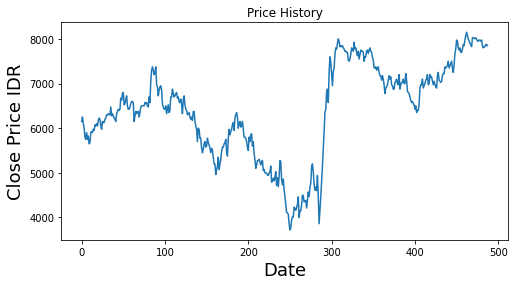

In [68]:
# Visualize the closing price history
plt.figure(figsize=(8,4))
plt.title('Price History')
plt.plot(data['close'])
#plt.plot(data['open'])

# df['Close']
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price IDR',fontsize=18)
plt.show()

standar scaler, menstandarisasi angka menjadi  diantara 1 dan 0

In [9]:
import numpy as np
from sklearn.model_selection import train_test_split

# DI SPLIT
X_train, X_test, y_train, y_test = train_test_split(data_label, data_close, test_size=0.2, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(390, 5)
(98, 5)
(390, 1)
(98, 1)


In [11]:
# Scale the all of the data to be values between 0 and 1 
scaler = MinMaxScaler(feature_range=(0, 1)) 

# DI SCALER X_TRAIN DAN Y_TRAIN
scaled_data = scaler.fit_transform(X_train)
scaled_label = scaler.fit_transform(y_train)
scaled_test_data = scaler.fit_transform(X_test)
scaled_test_label = scaler.fit_transform(y_test)
print(scaled_data.shape)
print(scaled_label.shape)
print(scaled_test_data.shape)
print(scaled_test_label.shape)

(390, 5)
(390, 1)
(98, 5)
(98, 1)


In [13]:
# X_trainscaled_data
# X_train_scaled = np.reshape(scaled_data, (scaled_data.shape[0],scaled_data.shape[1]))
# print(X_train_scaled.shape)

# Y_train_scaled = np.reshape(scaled_label, (scaled_label.shape[0],scaled_label.shape[1]))
# print(Y_train_scaled.shape)

X_train_scaled_1 = np.reshape(scaled_data, (scaled_data.shape[0],scaled_data.shape[1],1))
print(X_train_scaled_1.shape)

Y_train_scaled_1 = np.reshape(scaled_label, (scaled_label.shape[0],scaled_label.shape[1],1))
print(Y_train_scaled_1.shape)

X_test_scaled_1 = np.reshape(scaled_test_data, (scaled_test_data.shape[0],scaled_test_data.shape[1],1))
print(X_test_scaled_1.shape)

Y_test_scaled_1 = np.reshape(scaled_test_label, (scaled_test_label.shape[0],scaled_test_label.shape[1],1))
print(Y_test_scaled_1.shape)

(390, 5, 1)
(390, 1, 1)
(98, 5, 1)
(98, 1, 1)


In [14]:
from keras.layers import Bidirectional,TimeDistributed,Conv1D,MaxPooling1D,Flatten,RepeatVector,ConvLSTM2D
from keras.losses import mean_squared_error
import tensorflow as tf
import tensorflow.keras.backend as K

def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(mean_squared_error(y_true, y_pred))

In [15]:
# Build the LSTM network model
model1 = Sequential()
model1.add(LSTM(units=50, return_sequences=True, input_shape=((5, 1))))
model1.add(Dense(units=25))
model1.add(Dense(units=25))
model1.add(Dense(units=1))
model1.compile(optimizer='adam', loss='mse')

#Bi Directional LSTM
model2 = Sequential()
model2.add(Bidirectional(LSTM(50, activation='relu'), input_shape=((5, 1))))
model2.add(Dense(1))
model2.compile(optimizer='adam', loss='mse')

#Vanilla LSTM
model3 = Sequential()
model3.add(LSTM(50, activation='relu'))
model3.add(Dense(1))
model3.compile(optimizer='adam', loss='mse')

#Stacked LSTM
model4 = Sequential()
model4.add(LSTM(50, activation='relu', return_sequences=True, input_shape=((5, 1))))
model4.add(LSTM(50, activation='relu'))
model4.add(Dense(1))
model4.compile(optimizer='adam', loss='mse')


In [16]:
history1 = model1.fit(X_train_scaled_1, Y_train_scaled_1, batch_size=1, epochs=50)

Epoch 1/50
390/390 [==============================] - 21s 2ms/step - loss: 0.0643
Epoch 2/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0120
Epoch 3/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0079
Epoch 4/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0056
Epoch 5/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0037
Epoch 6/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0025
Epoch 7/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0017
Epoch 8/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 9/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 10/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0014
Epoch 11/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0022
Epoch 12/50
390/390 [==============================] - 1s 2ms/step - loss: 0.0013
Epoch 13/50
390/390 [===

In [17]:
history2 = model2.fit(X_train_scaled_1, Y_train_scaled_1, batch_size=1, epochs=50)

Epoch 1/50
390/390 [==============================] - 11s 7ms/step - loss: 0.0684
Epoch 2/50
390/390 [==============================] - 3s 7ms/step - loss: 0.0020
Epoch 3/50
390/390 [==============================] - 3s 7ms/step - loss: 0.0012
Epoch 4/50
390/390 [==============================] - 3s 7ms/step - loss: 8.5093e-04
Epoch 5/50
390/390 [==============================] - 3s 7ms/step - loss: 6.6507e-04
Epoch 6/50
390/390 [==============================] - 3s 7ms/step - loss: 7.5263e-04
Epoch 7/50
390/390 [==============================] - 3s 7ms/step - loss: 7.6505e-04
Epoch 8/50
390/390 [==============================] - 3s 7ms/step - loss: 7.4079e-04
Epoch 9/50
390/390 [==============================] - 3s 7ms/step - loss: 8.1081e-04
Epoch 10/50
390/390 [==============================] - 3s 7ms/step - loss: 9.1420e-04
Epoch 11/50
390/390 [==============================] - 3s 7ms/step - loss: 8.9090e-04
Epoch 12/50
390/390 [==============================] - 3s 7ms/step - loss:

In [18]:
history3 = model3.fit(X_train_scaled_1, Y_train_scaled_1, batch_size=1, epochs=50)

Epoch 1/50
390/390 [==============================] - 12s 4ms/step - loss: 0.0961
Epoch 2/50
390/390 [==============================] - 2s 4ms/step - loss: 0.0019
Epoch 3/50
390/390 [==============================] - 2s 4ms/step - loss: 0.0011
Epoch 4/50
390/390 [==============================] - 2s 5ms/step - loss: 9.1689e-04
Epoch 5/50
390/390 [==============================] - 2s 4ms/step - loss: 8.2860e-04
Epoch 6/50
390/390 [==============================] - 2s 5ms/step - loss: 8.2521e-04
Epoch 7/50
390/390 [==============================] - 2s 4ms/step - loss: 8.6575e-04
Epoch 8/50
390/390 [==============================] - 2s 4ms/step - loss: 8.3677e-04
Epoch 9/50
390/390 [==============================] - 2s 4ms/step - loss: 8.9432e-04
Epoch 10/50
390/390 [==============================] - 2s 4ms/step - loss: 7.6611e-04
Epoch 11/50
390/390 [==============================] - 2s 4ms/step - loss: 8.9187e-04
Epoch 12/50
390/390 [==============================] - 2s 4ms/step - loss:

In [19]:
history4 = model4.fit(X_train_scaled_1, Y_train_scaled_1, batch_size=1, epochs=50)

Epoch 1/50
390/390 [==============================] - 5s 8ms/step - loss: 0.0950
Epoch 2/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0020
Epoch 3/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0010
Epoch 4/50
390/390 [==============================] - 3s 8ms/step - loss: 9.3324e-04
Epoch 5/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0015
Epoch 6/50
390/390 [==============================] - 3s 8ms/step - loss: 9.1827e-04
Epoch 7/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0013
Epoch 8/50
390/390 [==============================] - 3s 8ms/step - loss: 9.9680e-04
Epoch 9/50
390/390 [==============================] - 3s 8ms/step - loss: 0.0010
Epoch 10/50
390/390 [==============================] - 3s 8ms/step - loss: 9.1134e-04
Epoch 11/50
390/390 [==============================] - 3s 8ms/step - loss: 8.6591e-04
Epoch 12/50
390/390 [==============================] - 3s 8ms/step - loss: 9.1625e-04
E

In [89]:
# print(prediction1)
print("============")
b = []
for i,idx in enumerate(Y_test_scaled_1):
  # print(i)
  b.append(idx[i])
# print(Y_test_scaled_1.shape)
from sklearn.metrics import mean_absolute_error

# a = mean_absolute_error(prediction1, Y_test_scaled_1)

# a

IndexError: ignored

TESTING 4 MODEL

In [72]:
from sklearn.preprocessing import MinMaxScaler

prediction1 = model1.predict(X_test_scaled_1)
print("RATA-RATA HARGA TEST",np.mean(((Y_test_scaled_1)*n)))

n = 10000
total_data_test = 98
# Calculate /Get the value of RMSE
rmse1 = np.sqrt(np.mean(((prediction1 - Y_test_scaled_1)**2)*n))
print("MODEL 1 - VANILA LSTM + DENSE LAYER")
print("RATA-RATA PERBEDAAN HARGA",np.mean(((prediction1 - Y_test_scaled_1)*n)))
print("RATA-RATA HARGA PREDIKSI",np.mean(((prediction1)*n)))
print('MSE PREDIKSI - TEST',np.mean((prediction1 - Y_test_scaled_1)**2) / 98)
print('RMSE PREDIKSI - TEST',np.sqrt(np.mean(((prediction1 - Y_test_scaled_1)**2)* 98)))


prediction2 = model2.predict(X_test_scaled_1)
print("MODEL 2 - BI LSTM + DENSE LAYER")
print("RATA-RATA PERBEDAAN HARGA",np.mean(((prediction2 - Y_test_scaled_1)*n)))
print("RATA-RATA HARGA PREDIKSI",np.mean(((prediction2)*n)))
print('MSE PREDIKSI - TEST',np.mean((prediction2 - Y_test_scaled_1)**2) / 98)
print('RMSE PREDIKSI - TEST',np.sqrt(np.mean((prediction2 - Y_test_scaled_1)**2) / 98))

prediction3 = model3.predict(X_test_scaled_1)
print("MODEL 3 - Vanila LSTM")
print("RATA-RATA PERBEDAAN HARGA",np.mean(((prediction3 - Y_test_scaled_1)*n)))
print("RATA-RATA HARGA PREDIKSI",np.mean(((prediction3)*n)))
print('MSE PREDIKSI - TEST',np.mean((prediction3 - Y_test_scaled_1)**2) / 98)
print('RMSE PREDIKSI - TEST',np.sqrt(np.mean((prediction3 - Y_test_scaled_1)**2) / 98))

prediction4 = model4.predict(X_test_scaled_1)
print("MODEL 4 - Stacked LSTM")
print("RATA-RATA PERBEDAAN HARGA",np.mean(((prediction4 - Y_test_scaled_1)*n)))
print("RATA-RATA HARGA PREDIKSI",np.mean(((prediction4)*n)))
print('MSE PREDIKSI - TEST',np.mean((prediction4 - Y_test_scaled_1)**2) / 98)
print('RMSE PREDIKSI - TEST',np.sqrt(np.mean((prediction4 - Y_test_scaled_1)**2) / 98))

RATA-RATA HARGA TEST 6442.437602218587
MODEL 1 - VANILA LSTM + DENSE LAYER
RATA-RATA PERBEDAAN HARGA 23.578547119823018
RATA-RATA HARGA PREDIKSI 6466.016
MSE PREDIKSI - TEST 1.3751466343416372e-05
RMSE PREDIKSI - TEST 0.3634131020782972
MODEL 2 - BI LSTM + DENSE LAYER
RATA-RATA PERBEDAAN HARGA -17.5741284212567
RATA-RATA HARGA PREDIKSI 6424.8633
MSE PREDIKSI - TEST 0.0010944119805948683
RMSE PREDIKSI - TEST 0.03308189808029262
MODEL 3 - Vanila LSTM
RATA-RATA PERBEDAAN HARGA 15.199899471872941
RATA-RATA HARGA PREDIKSI 6457.638
MSE PREDIKSI - TEST 0.0011193575449869107
RMSE PREDIKSI - TEST 0.03345680117684461
MODEL 4 - Stacked LSTM
RATA-RATA PERBEDAAN HARGA -28.079034239933158
RATA-RATA HARGA PREDIKSI 6414.3584
MSE PREDIKSI - TEST 0.0010950012564796675
RMSE PREDIKSI - TEST 0.0330908032008845


plot result 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


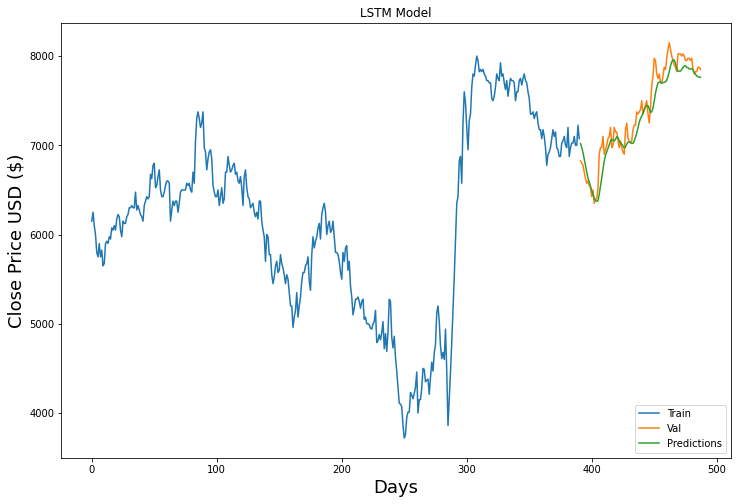

In [ ]:
# Plot/Create the data for the graph
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions4  #######pakai model terbaik
# Visualize the data
plt.figure(figsize=(12,8))
plt.title('LSTM Model')
plt.xlabel('Days', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['close'])
plt.plot(valid[['close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
# Get the quote
bmri_quote  = data
# BMRI_quote
# Create a new dataframe
new_df = bmri_quote.filter(['close'])

# Get the last 60 day closing price 
last_60_days = new_df[0:30].values
# Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.fit_transform(last_60_days)
# Create an empty list
X_test2 = []
# Append teh past 60 days
X_test2.append(last_60_days_scaled)
# Convert the X_test data set to a numpy array
X_test2 = np.array(X_test2)
# Reshape the data
X_test2 = np.reshape(X_test2, (X_test2.shape[0], X_test2.shape[1], 1))


In [ ]:
last_60_days.shape

(30, 1)

In [ ]:
# Get the predicted scaled price
pred_price = model4.predict(X_test2)   #############pake model terbaik
# undo the scaling 
pred_price = scaler.inverse_transform(pred_price)

#print(pred_price)

In [ ]:
# Get the quote
bmri_uji_harga_hari_ini = data['close'][0]
bmri_uji_harga_kemarin = data['close'][1]
# hasil = apple_quote2['Close'] - pred_price[0][0]
# print(pred_price[0][0])
print("harga hari ini kenyantaan",bmri_uji_harga_hari_ini)

# Hasil Prediksi Besok akan terjadi kenaikan 2% 
tambah2persen = math.ceil(pred_price[0][0])
# new_value = tambah2persen - pred_price[0][0] * 0.01 
print("harga besok",tambah2persen)

LSTM_hasil = 1
# JIKA HASIL PREDIKSI BESOK LEBIH BESAR 1.5 % DIBANDING HARGA HARI INI ATAU KEMARIN MAKA BELI
if bmri_uji_harga_hari_ini < tambah2persen:
  print("Beli Karena Prediksi akan terjadi kenaikan")
  LSTM_hasil = 1
elif bmri_uji_harga_kemarin < tambah2persen:
  print("Beli Karena Prediksi akan terjadi kenaikan")
  LSTM_hasil = 1
else :
  print("Jangan beli karena akan terjadi penurunan")
  LSTM_hasil = 0

harga hari ini kenyantaan 6150
harga besok 6157
Beli Karena Prediksi akan terjadi kenaikan


In [ ]:
PEINT_R = 18.98
DYINT_R = 3.5
NGINT_R = -37.7
MCINT_R = 287

In [ ]:
# EXPERT SCORING WITH DECISION TREE KHUSUS UNTUK SEKTOR BANK
print("Hasil dari LSTM",LSTM_hasil)
scoring = 0
params = []
# SYARAT PE TIDAK LEBIH BESAR DIBANDING 15 , DIVIDEN YIELD > 4% , Pertumbuhan Net Icome by Year 1.5% , 
# Market Cap > 200Triliun dan Hasil LSTM Positif Naik Besok
if PEINT_R < 15.5:
    scoring += 22 
    #print("PEINT_R")
    params.append("Price Earning Ratio")
if DYINT_R > 4 :
    scoring += 28
    #print("DYINT_R")
    params.append("Pembagian Jumlah Dividen")
if NGINT_R > 1.5 :
    scoring += 20
    #print("NGINT_R")
    params.append("Pendapatan Bersih Perusahaan")
if MCINT_R > 200 : 
    scoring += 10
    #print("MCINT_R")
    params.append("Market Capital Antimology2")
if LSTM == 1 :
    scoring += 20
    params.append("Close Price Prediction LSTM")

print(f"Saham ini disupport oleh Parameter baik dengan score {scoring}\nseperti", params)

if scoring < 60:
   print(f"Saham jelek jan dibeli")
else:
  print(f"Saham jelek jan dibeli")

Hasil dari LSTM 1
Saham ini disupport oleh Parameter baik dengan score 10
seperti ['Market Capital Antimology2']
Saham jelek jan dibeli
